# Semana Acadêmica 2023 da Engenharia de Computação
Curso: YOLO

Ministrante: Prof. Sandro Camargo


You only look once (YOLO), ou Você Olha Apenas uma Vez, é o estado da arte em sistemas de detecção de objetos em tempo real. Em uma GPU Pascal Titan X são processadas imagens de 30 FPS e tem um mAP de 57.9% na base de testes COCO.

O algoritmo YOLO foi treinado com a base COCO <https://cocodataset.org/>

Um breve histórico das versões do YOLO: https://dataphoenix.info/a-guide-to-the-yolo-family-of-computer-vision-models/

A última versão é o YOLOv8.

# Configuração de ambiente

O primeiro passo é cloar o [repositório](https://github.com/ultralytics/yolov5) GitHub, instalar as [dependências](https://github.com/ultralytics/yolov5/blob/master/requirements.txt) e verificar o PyTorch e a GPU.

In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-185-g2334aa7 Python-3.10.12 torch-2.0.1+cu118 CPU


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.1/107.7 GB disk)


In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


# 1. Detectar objetos

`detect.py` executa a inferência YOLOv5 inferenceem várias fontes de imagens ou de vídeos, baixa os modelos automaticamente do site [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases) e armazena os resultados na pasta `runs/detect` do seu ambiente do google colab. Exemplos de fontes de inferência são:

```shell
python detect.py --source 0  # webcam
                          img.jpg  # image
                          vid.mp4  # video
                          screen  # screenshot
                          path/  # directory
                         'path/*.jpg'  # glob
                         'https://youtu.be/Zgi9g1ksQHc'  # YouTube
                         'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP stream
```

In [18]:
# para executar sobre uma imagem que está no seu ambiente colab, informe o caminho do arquivo em source
!python detect.py --conf 0.3 --source 'data/images/bus.jpg' --data data/coco.yaml

detect: weights=yolov5s.pt, source=data/images/bus.jpg, data=data/coco.yaml, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-185-g2334aa7 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/1 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, 47.1ms
Speed: 0.6ms pre-process, 47.1ms inference, 86.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp16


In [4]:
# para executar sobre várias imagens que estão no seu ambiente colab, informe o caminho da pasta em source
!python detect.py --conf 0.3 --source 'data/images/' --data data/coco.yaml

detect: weights=yolov5s.pt, source=data/images/, data=data/coco.yaml, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-185-g2334aa7 Python-3.10.12 torch-2.0.1+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/10 /content/yolov5/data/images/RacasGatos.png: 384x640 3 cats, 2 dogs, 481.4ms
image 2/10 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, 529.6ms
image 3/10 /content/yolov5/data/images/cavalos-campo.png: 480x640 5 horses, 496.2ms
image 4/10 /content/yolov5/data/images/colho-pinto.png: 448x640 1 bird, 491.8ms
image 5/10 /content/yolov5/data/images/furao.png: 384x640 1 dog, 398.3ms
image 6/10

In [9]:
# Para executar sobre alguma imagem que está disponível na internet, informe o link direto
!python detect.py --conf 0.3 --source 'https://revistanews.com.br/wp-content/uploads/2022/09/Desfile-farroupilha-NH.jpg' --data data/coco.yaml

detect: weights=yolov5s.pt, source=https://revistanews.com.br/wp-content/uploads/2022/09/Desfile-farroupilha-NH.jpg, data=data/coco.yaml, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
100% 54.0k/54.0k [00:00<00:00, 176kB/s]
YOLOv5 🚀 v7.0-185-g2334aa7 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/1 /content/yolov5/Desfile-farroupilha-NH.jpg: 384x640 6 persons, 2 cars, 7 horses, 74.6ms
Speed: 0.6ms pre-process, 74.6ms inference, 107.7ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp7


In [10]:
!python detect.py --conf 0.3 --source 'https://estado.rs.gov.br/upload/recortes/201707/19202713_1174768_GD.jpg' --data data/coco.yaml

detect: weights=yolov5s.pt, source=https://estado.rs.gov.br/upload/recortes/201707/19202713_1174768_GD.jpg, data=data/coco.yaml, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
100% 112k/112k [00:01<00:00, 81.1kB/s] 
YOLOv5 🚀 v7.0-185-g2334aa7 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/1 /content/yolov5/19202713_1174768_GD.jpg: 384x640 4 cows, 73.1ms
Speed: 0.5ms pre-process, 73.1ms inference, 111.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp8


In [16]:
!python detect.py --conf 0.3 --source screen --data data/coco.yaml

detect: weights=yolov5s.pt, source=screen, data=data/coco.yaml, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-185-g2334aa7 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Traceback (most recent call last):
  File "/content/yolov5/detect.py", line 261, in <module>
    main(opt)
  File "/content/yolov5/detect.py", line 256, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    return func(*args, **kwargs)
  File "/content/yolov5/detect.py", line 109, in run
    dataset = LoadScree

In [6]:
# Para executar sobre um video do youtube, informe o link direto
!python detect.py --conf 0.3 --source 'https://youtu.be/aeMhNpb6Dlg' --data data/coco.yaml

detect: weights=yolov5s.pt, source=https://youtu.be/aeMhNpb6Dlg, data=data/coco.yaml, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-185-g2334aa7 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

1/1: https://youtu.be/aeMhNpb6Dlg...  Success (693 frames 1280x720 at 30.00 FPS)

0: 384x640 3 persons, 5 cars, 2 motorcycles, 1 bus, 2 trucks, 860.7ms
0: 384x640 4 persons, 8 cars, 1 motorcycle, 2 trucks, 2 traffic lights, 8.2ms
0: 384x640 4 persons, 8 cars, 1 motorcycle, 2 trucks, 2 traffic lights, 

In [5]:
!python detect.py --conf 0.3 --source 'https://youtu.be/z0AfpPI_ecI' --data data/coco.yaml

Streaming output truncated to the last 5000 lines.
0: 384x640 (no detections), 5.4ms
0: 384x640 (no detections), 5.5ms
0: 384x640 (no detections), 9.9ms
0: 384x640 (no detections), 12.2ms
0: 384x640 (no detections), 9.5ms
0: 384x640 (no detections), 7.4ms
0: 384x640 (no detections), 6.0ms
0: 384x640 (no detections), 5.8ms
0: 384x640 (no detections), 5.6ms
0: 384x640 (no detections), 6.0ms
0: 384x640 (no detections), 9.7ms
0: 384x640 (no detections), 7.3ms
0: 384x640 (no detections), 6.3ms
0: 384x640 (no detections), 5.9ms
0: 384x640 (no detections), 5.7ms
0: 384x640 (no detections), 5.3ms
0: 384x640 (no detections), 4.6ms
0: 384x640 (no detections), 4.8ms
0: 384x640 (no detections), 5.0ms
0: 384x640 (no detections), 5.5ms
0: 384x640 (no detections), 5.4ms
0: 384x640 (no detections), 4.8ms
0: 384x640 (no detections), 5.1ms
0: 384x640 (no detections), 5.0ms
0: 384x640 (no detections), 4.9ms
0: 384x640 (no detections), 4.9ms
0: 384x640 (no detections), 5.0ms
0: 384x640 (no detections), 5.

# Appendix

Additional content below.

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 v7.0-185-g2334aa7 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
image 1/1: 720x1280 2 persons, 2 ties
Speed: 499.7ms pre-process, 8.5ms inference, 1.5ms NMS per image at shape (1, 3, 384, 640)
Saved 1 image to runs/detect/exp2


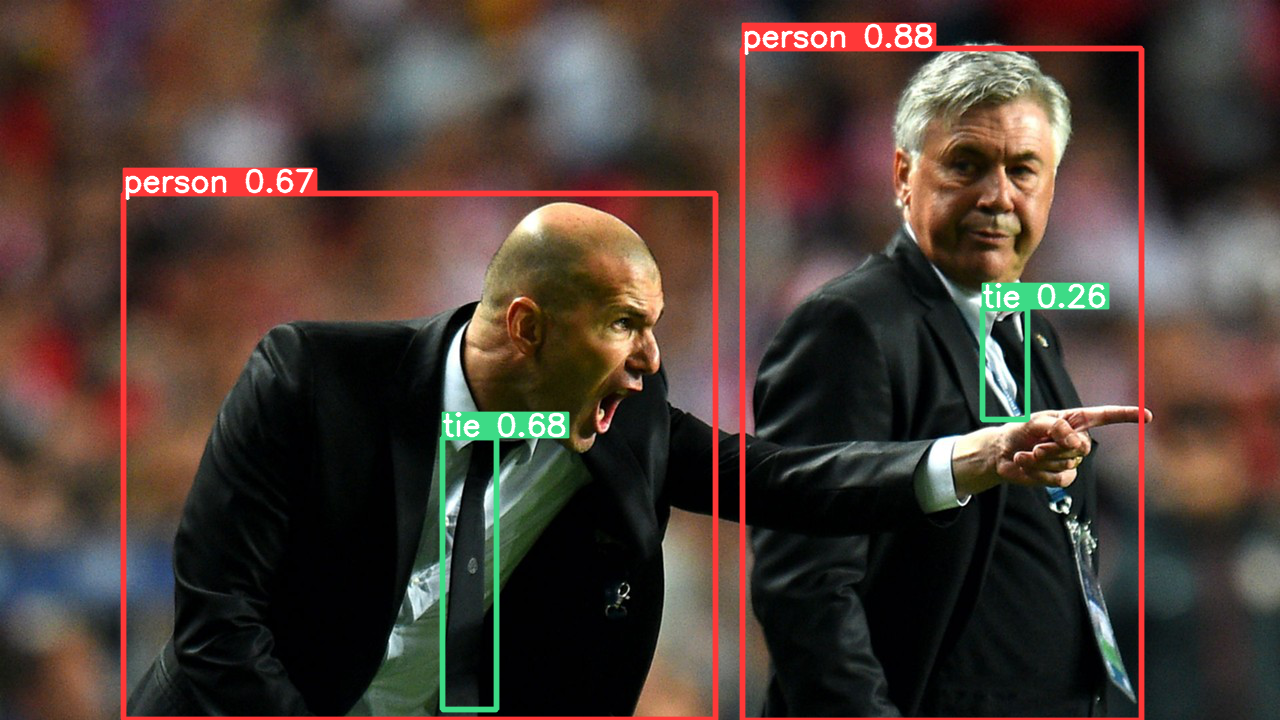

In [4]:
# Inferência do modelo YOLOv5 PyTorch HUB (DetectionModels only)
import torch

model = torch.hub.load('ultralytics/yolov5', 'yolov5s', force_reload=True)  # yolov5n - yolov5x6 ou alguma adaptação
im = 'https://ultralytics.com/images/zidane.jpg'  # arquivo, pasta, PIL.Image, OpenCV, nparray, lista
results = model(im)  # aplica o modelo
results.print()  # ou .show(), .save(), .crop(), .pandas(), etc.
results.save('zidane.jpg')
results.show()

# Treinando o YOLO para novos problemas

Processo se inicia pela rotulagem, passa pelo retreinamento e finalmente chega à fase de uso.

A rotulagem é feita através de ferramentas como o LabelImg.